Преподаватель: Вячеслав Потапов
Итоговая работа по курсу «Python и математика для анализа данных»

Проектная работа по модулю “Математика и статистика в Python”
1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr
from scipy import stats

In [6]:
#1.Загрузить файл hr.csv.
hr_df = pd.read_csv('hr.csv')

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
#2. Рассчитать основные статистики для переменных (медиана,мода).
print('Медиана:\n', hr_df.median())
print('Мода satisfaction_level ',statistics.mode(hr_df.satisfaction_level))
print('Мода last_evaluation ',statistics.mode(hr_df.last_evaluation))
#print('Мода number_project ',statistics.mode(hr_df.number_project))
#print('Мода average_montly_hours ',statistics.mode(hr_df.average_montly_hours))
print('Мода time_spend_company ',statistics.mode(hr_df.time_spend_company))
print('Мода Work_accident ',statistics.mode(hr_df.Work_accident))
print('Мода left ',statistics.mode(hr_df.left))
print('Мода promotion_last_5years ',statistics.mode(hr_df.promotion_last_5years))

Медиана:
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
Мода satisfaction_level  0.1
Мода last_evaluation  0.55
Мода time_spend_company  3
Мода Work_accident  0
Мода left  0
Мода promotion_last_5years  0


0.1711634045107436

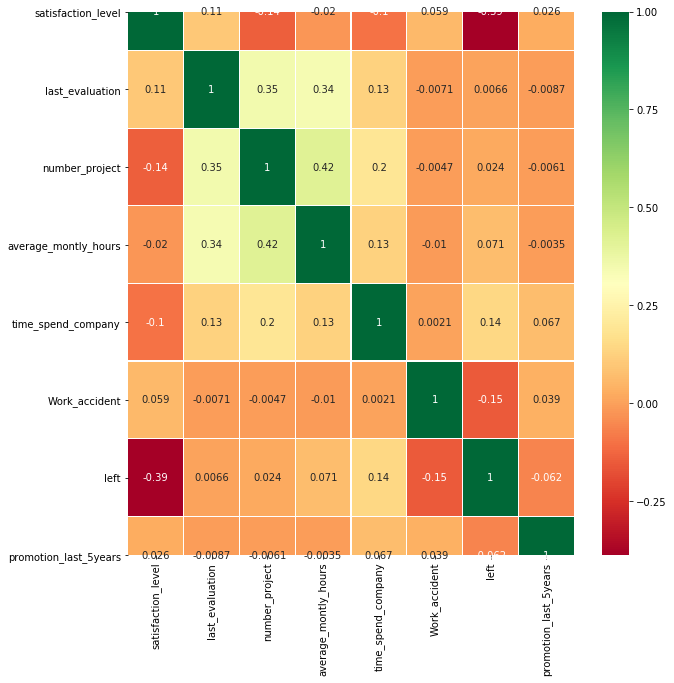

In [30]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных.

sns.heatmap(hr_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [31]:
#sns.pairplot(hr_df)

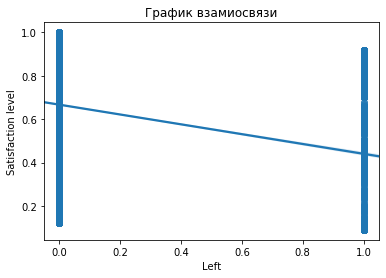

In [35]:
#4.Визуализировать несколько взаимосвязей между переменными.
sns.regplot(x= hr_df.left, y=hr_df.satisfaction_level,data= hr_df, fit_reg=True)

plt.xlabel('Left')
plt.ylabel('Satisfaction level')
#plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('График взамиосвязи')
plt.show()

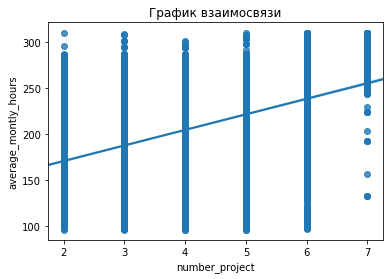

In [39]:
#4.Визуализировать несколько взаимосвязей между переменными.
sns.regplot(x= hr_df.number_project, y=hr_df.average_montly_hours,data= hr_df, fit_reg=True)

plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
#plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('График взаимосвязи')
plt.show()

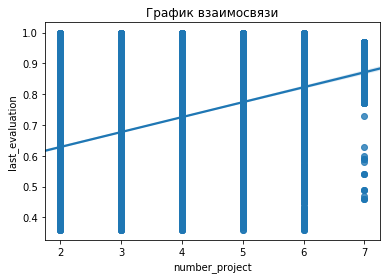

In [40]:
#4.Визуализировать несколько взаимосвязей между переменными.
sns.regplot(x= hr_df.number_project, y=hr_df.last_evaluation,data= hr_df, fit_reg=True)

plt.xlabel('number_project')
plt.ylabel('last_evaluation')
#plt.legend(['Генеральная совокупность', 'Выборка'])
plt.title('График взаимосвязи')
plt.show()

In [42]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
#Проверим зависимость уровня удовлетворённости(Satisfaction_level) от статуса ( left)
from scipy.stats import kendalltau
stat, p = kendalltau(hr_df.satisfaction_level, hr_df.left)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Показатели скорее независимы')
else:
    print('Показатели скорее всего зависимы')

stat=-0.301, p=0.000
Показатели скорее всего зависимы


In [43]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
#Проверим зависимость (last_evaluation) cо средним рабочим временем в месяц (average_montly_hours)
from scipy.stats import spearmanr

stat, p = spearmanr(hr_df.last_evaluation, hr_df.average_montly_hours)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Показатели скорее независимы')
else:
    print('Показатели скорее всего зависимы')

stat=0.342, p=0.000
Показатели скорее всего зависимы


In [81]:
#6.Рассчитать сколько работников работает в каждом департаменте.

dep_workers = hr_df.groupby('sales').count().left.reset_index()
dep_workers.columns = ['department', 'quantity']
dep_workers


,department,quantity
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


In [82]:
#7.Показать распределение сотрудников по зарплатам.

In [84]:
salary_df= hr_df.groupby('salary').count().left.reset_index()
salary_df.columns = ['salary_level', 'quantity']
salary_df

,salary_level,quantity
0,high,1237
1,low,7316
2,medium,6446


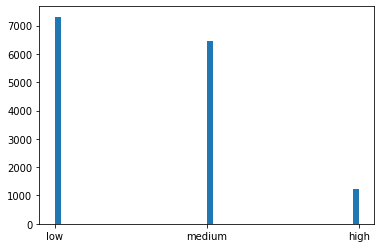

In [135]:
plt.hist(hr_df['salary'], 50)
plt.show()

In [97]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами.
dep_sl = hr_df.groupby(['sales','salary']).count().left.reset_index()
dep_sl.columns = ['department','salary_level', 'quantity']
dep_sl
#df.groupby(['userID','slot'], as_index=False).sum()

,department,salary_level,quantity
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [112]:
#9.Сколько сотрудников покинули компанию.
print('Количество сотрудников покинувших компанию',hr_df['left'].loc[hr_df['left']==1].sum(),'человек')

Количество сотрудников покинувших компанию 3571 человек


In [110]:
#10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.:
#Гипотезы: 
#а) Чаще покидают компанию сотрудники с низким уровне зарплаты- сравнить зависимость left от salary (многофакторный)
#б) Проишествие на работе( work_accident) ведёт к уходу с работы
#в) Стаж не связан с решением об уходе

In [ ]:
#а) Чаще покидают компанию сотрудники с низким уровне зарплаты- сравнить зависимость left от salary (многофакторный)


In [137]:
salary_l = hr_df[hr_df['salary']=='low']['left']

salary_m = hr_df[hr_df['salary']== 'medium']['left']

salary_h = hr_df[hr_df['salary']=='high']['left']

stats.f_oneway(salary_l, salary_m, salary_h)


#Так как результат p-value ,больше 0.05,
#то мы подтверждаем нулевую гипотезу- то есть подтверждаем тот факт, что различный уровень зарплаты
#не влияет на решение на увольнение

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

In [114]:
#б) Проишествие на работе( work_accident) ведёт к уходу с работы


In [141]:
#Нулевая гипотеза предполагает, что наличие Work_accident никак не связано с уходом сотрудника из компании.
accident = hr_df[hr_df['left']==1]['Work_accident']
stats.ttest_1samp(accident, hr_df['Work_accident'].mean())

#Нулевая гипотеза должна должна быть принята, показатели Work_accident и left не имеют прямой связи.

Ttest_1sampResult(statistic=-27.375035987124736, pvalue=6.146641075602401e-150)

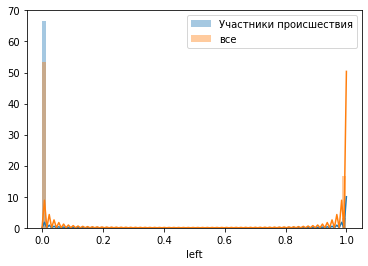

In [142]:
accident = hr_df[hr_df['left']==1]['Work_accident']
left_p = hr_df['left']
sns.distplot(accident, 70)
sns.distplot(left_p, 70)
plt.title('')
plt.legend(['Участники происшествия', 'все']) 
plt.show()
#На графике видно, что количество пройсшествия на работе на являются причиной ухода из компании. 

In [ ]:
#в) Стаж работы связан с решением об уходе

In [140]:
seniority = hr_df[hr_df['left']==1]['time_spend_company']
stats.ttest_1samp(seniority, hr_df['time_spend_company'].mean())

#p-value больше 0,05 говорит о том что достоверная связь стажа работы и увольнения отсутствует.

Ttest_1sampResult(statistic=23.120349280818616, pvalue=2.518024251375598e-110)

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете